In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
import torch

### Problem Statement:

Predicting the optimal crop that could be grown in a particular location based on the
soil composition, rainfall, temperature and return of investment is essential for any
farmer of the modern world. This could not only save farmers from spending extra
money on fertilizers but also avoid the dangerous practice of growing the same crops
on the same patch of land repeatedly, which depletes the solid from its natural
resources.

#### given dataset links:

1) https://www.kaggle.com/datasets/thammuio/all-agriculture-related-datasets-for-india

2) https://www.kaggle.com/datasets/vanvalkenberg/historicalweatherdataforindiancities

3) https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

4) https://www.kaggle.com/datasets/rajanand/rainfall-in-india



In [89]:
df1=pd.read_csv("Crop_recommendation.csv")

In [90]:
from sklearn.model_selection import train_test_split
set(df1.label)

{'apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon'}

In [91]:
df1.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


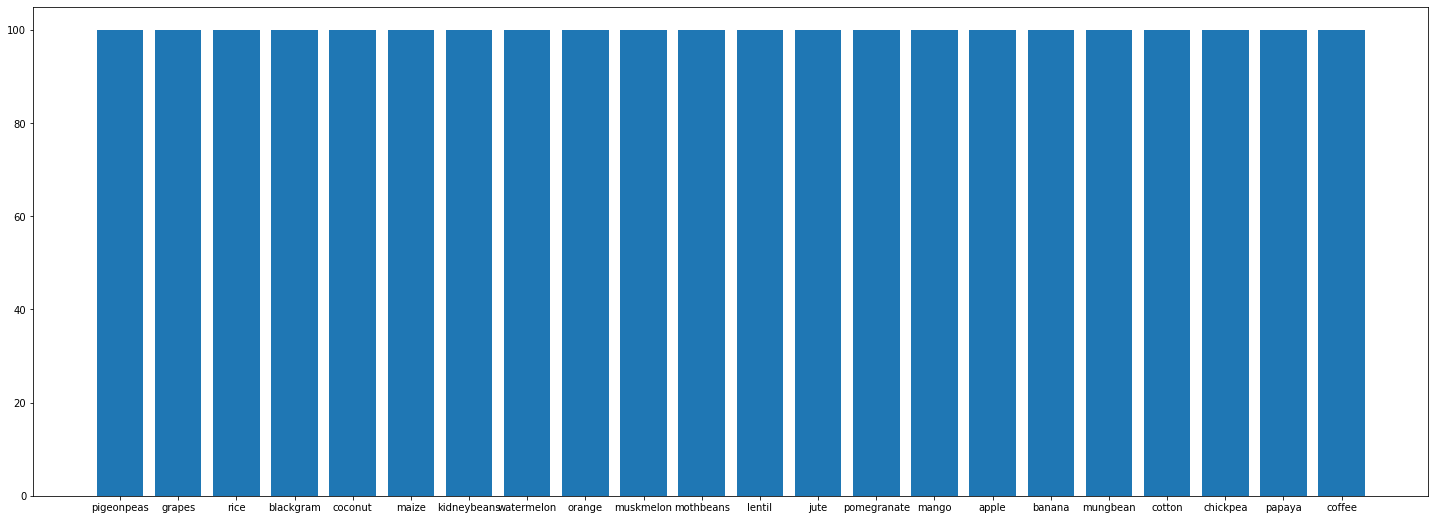

In [92]:
plt.figure(figsize=(25,9))
plt.bar(list(set(df1.label)),[list(df1['label']).count(i) for i in set(df1.label)])
plt.show()
# ALL CLASSES ARE PRESENT IN COMMON

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
le=LabelEncoder()
X=df1.drop(inplace=False,columns=['label'])
y=df1['label']
y=le.fit_transform(y)


In [95]:
df1.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [96]:
y

array([20, 20, 20, ...,  5,  5,  5])

In [104]:
from xgboost import XGBClassifier,XGBRegressor
from interpret.glassbox import ExplainableBoostingClassifier,ExplainableBoostingRegressor
import pickle

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [99]:
xgb=XGBClassifier()
ebm=ExplainableBoostingClassifier()

In [100]:
xgb.fit(X_train,y_train)
ebm.fit(X_train,y_train)

C:\Users\sutha\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:46:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sutha\anaconda3\lib\site-packages\interpret\glassbox\ebm\ebm.py:568: UserWarning: Detected multiclass problem. Forcing interactions to 0. Multiclass interactions work except for global visualizations, so the line below setting interactions to zero can be disabled if you know what you are doing.
  warn("Detected multiclass problem. Forcing interactions to 0. Multiclass interactions work except for global visualizations, so the line below setting interactions to zero can be disabled if you know what you are doing.")


ExplainableBoostingClassifier()

In [101]:
y_pred=xgb.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix

print(f"XGBoost Classifier prediction accuracy: {accuracy_score(y_pred,y_test)}")
y_pred=ebm.predict(X_test)
print(f"Explainable Boosting Classifier prediction accuracy: {accuracy_score(y_pred,y_test)}")

XGBoost Classifier prediction accuracy: 0.990909090909091
Explainable Boosting Classifier prediction accuracy: 0.9886363636363636


In [102]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [103]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print(f"Random Forest Classifier prediction accuracy: {accuracy_score(y_pred,y_test)}")

Random Forest Classifier prediction accuracy: 0.9954545454545455


In [105]:
pickle.dump(rfc, open('rfc_crop_recommendation.pkl', 'wb'))


# Agricultural dataset 

In [109]:
df2=pd.read_csv("Indian_agriculture.csv",parse_dates=['arrival_date'])

In [110]:
df2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   state         2238 non-null   object        
 1   district      2238 non-null   object        
 2   market        2238 non-null   object        
 3   commodity     2238 non-null   object        
 4   label         2238 non-null   object        
 5   arrival_date  2238 non-null   datetime64[ns]
 6   min_price     2238 non-null   int64         
 7   max_price     2238 non-null   int64         
 8   modal_price   2238 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 157.5+ KB


In [115]:
X=df2.drop(columns=['label'])
X=X.iloc[:,:5]
X.drop(columns=['market'],inplace=True)
y=[df2.min_price,df2.max_price,df2.modal_price]

le_df2=LabelEncoder()
X['state']=le_df2.fit_transform(X['state'])
X['district']=le_df2.fit_transform(X['district'])
X['commodity']=le_df2.fit_transform(X['commodity'])
X['Year'] = X['arrival_date'].apply(lambda time: time.year)
X['Month'] = X['arrival_date'].apply(lambda time: time.month)
X['Day'] = X['arrival_date'].apply(lambda time: time.day)
X.drop(["arrival_date"],axis=1,inplace=True)
print(X)

best_models=[]
for i in range(len(y)):
    models=[ExplainableBoostingRegressor(),RandomForestRegressor(),XGBRegressor()]
    X_train,X_test,y_train,y_test=train_test_split(X,y[i],test_size=0.2,random_state=42)
    print(f'y{i} results:')
    for j in range(len(models)):
        models[j].fit(X_train,y_train)
        print(models[j])
        score=r2_score(y_test,models[j].predict(X_test))
        print(score)
        if j==0 or score>max_acc:
            best=models[j]
            max_acc=score
    best_models.append(best)
            

      state  district  commodity  Year  Month  Day
0         0       153          0  2019      4    3
1         0       153         10  2019      4    3
2         0       153         18  2019      4    3
3         0       153         19  2019      4    3
4         0       153         22  2019      4    3
...     ...       ...        ...   ...    ...  ...
2233     25       167        118  2019      4    3
2234     25       167        123  2019      4    3
2235     25       167         74  2019      4    3
2236     25       167        123  2019      4    3
2237     25       167        152  2019      4    3

[2238 rows x 6 columns]
y0 results:
ExplainableBoostingRegressor()
0.5919004876778682
RandomForestRegressor()
0.5721419243289004


C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
0.5590363039637746
y1 results:
ExplainableBoostingRegressor()
0.5199062303999709
RandomForestRegressor()
0.5734648116524124


C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
0.5765239806890385
y2 results:
ExplainableBoostingRegressor()
0.4657563630225735
RandomForestRegressor()
0.5975311525055331


C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
0.5816416886816616


Common crops in df1 and df2: 
Banana
Rice
Papaya
Orange
Jute
Cotton
Apple
Coconut
Mango
Pomegranate
Grapes
Maize


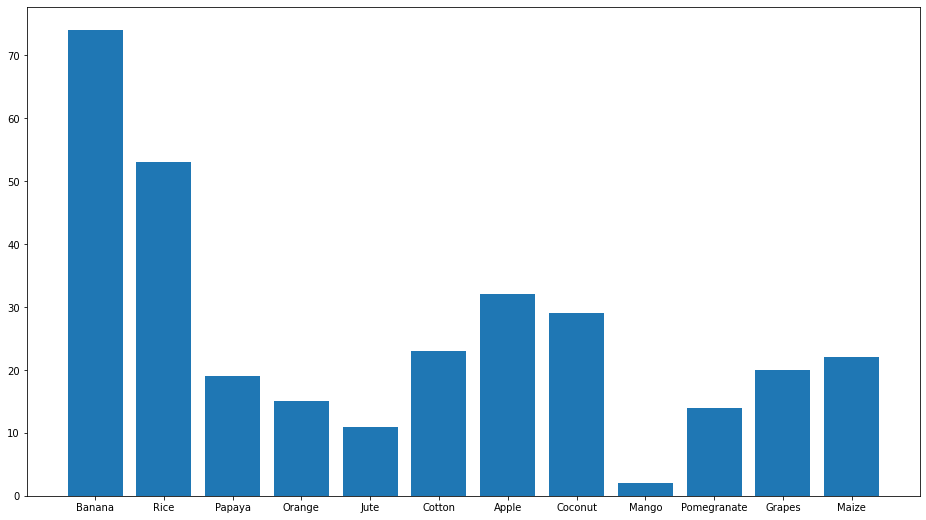

[ExplainableBoostingRegressor(),
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None),
 RandomForestRegressor()]

In [116]:
## looking at crops that are common in df2 and df1
print("Common crops in df1 and df2: ")
label=[]
count=[]
for i in set(df2.commodity):
    if i.lower() in set(df1.label):
        print(i)
        label.append(i)
        count.append(list(df2.commodity).count(i))

plt.figure(figsize=(16,9))
plt.bar(label,count)
plt.show()
best_models

In [117]:
pickle.dump(best_models[1], open('expected_price_prediction.pkl', 'wb'))

# Common types of soil in India

** according to https://currentaffairs.adda247.com/major-soil-types-of-india-map/ **
1. Alluvial soil - maize, rice, pulses
2. Black soil - cotton
3. Peaty Soil - 
4. Saline and alkaline soil - infertile
5. Red soil
6. Desert soil
7. Laterite soil -coconut, coffee, cashew nuts, and rice
8. Mountain soil

In [21]:
from scipy.stats import spearmanr
print(spearmanr(df1.rainfall,df1.N))
print(spearmanr(df1.rainfall,df1.P))
print(spearmanr(df1.rainfall,df1.K))
print(spearmanr(df1.rainfall,df1.ph))

SpearmanrResult(correlation=0.011411146247036836, pvalue=0.5926889755760951)
SpearmanrResult(correlation=-0.032456774096165084, pvalue=0.12803579560964418)
SpearmanrResult(correlation=0.06990320344875078, pvalue=0.0010347593510654286)
SpearmanrResult(correlation=-0.1512802682960735, pvalue=9.8399168859438e-13)


## Weather prediction

dataset used: https://www.kaggle.com/datasets/saisaran2/rainfall-data-from-1901-to-2017-for-india

In [118]:
df3=pd.read_csv("Rainfall_Data_LL.csv")

In [119]:
df3.drop(columns=["Name"],inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4187 entries, 0 to 4186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SUBDIVISION     4187 non-null   object 
 1   YEAR            4187 non-null   int64  
 2   JAN             4187 non-null   float64
 3   FEB             4187 non-null   float64
 4   MAR             4187 non-null   float64
 5   APR             4187 non-null   float64
 6   MAY             4187 non-null   float64
 7   JUN             4187 non-null   float64
 8   JUL             4187 non-null   float64
 9   AUG             4187 non-null   float64
 10  SEP             4187 non-null   float64
 11  OCT             4187 non-null   float64
 12  NOV             4187 non-null   float64
 13  DEC             4187 non-null   float64
 14  ANNUAL          4187 non-null   float64
 15  Jan-Feb         4187 non-null   float64
 16  Mar-May         4187 non-null   float64
 17  June-September  4187 non-null   f

In [120]:
X=df3.iloc[:,:2]
X

,SUBDIVISION,YEAR
0,Andaman & Nicobar Islands,1901
1,Andaman & Nicobar Islands,1902
2,Andaman & Nicobar Islands,1903
3,Andaman & Nicobar Islands,1904
4,Andaman & Nicobar Islands,1905
...,...,...
4182,Lakshadweep,2012
4183,Lakshadweep,2013
4184,Lakshadweep,2014
4185,Lakshadweep,2015


In [121]:
period=input('(JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL)?')
y=df3[period]

(JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL)?ANNUAL


In [122]:
le_state=LabelEncoder()
X['SUBDIVISION']=le_state.fit_transform(X['SUBDIVISION'])

In [123]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [124]:
y_pred=rfr.predict(X_test)

In [125]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.8706804947617304

In [126]:
xgbr=XGBRegressor()
xgbr.fit(X_train,y_train)
y_pred=xgbr.predict(X_test)
r2_score(y_test,y_pred)

C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.8968687929408511

In [127]:
ebr=ExplainableBoostingRegressor()
ebr.fit(X_train,y_train)
y_pred=ebr.predict(X_test)
r2_score(y_test,y_pred)

0.8895842897947297

In [128]:
pickle.dump(x, open('annual_rainfall_prediction.pkl', 'wb'))